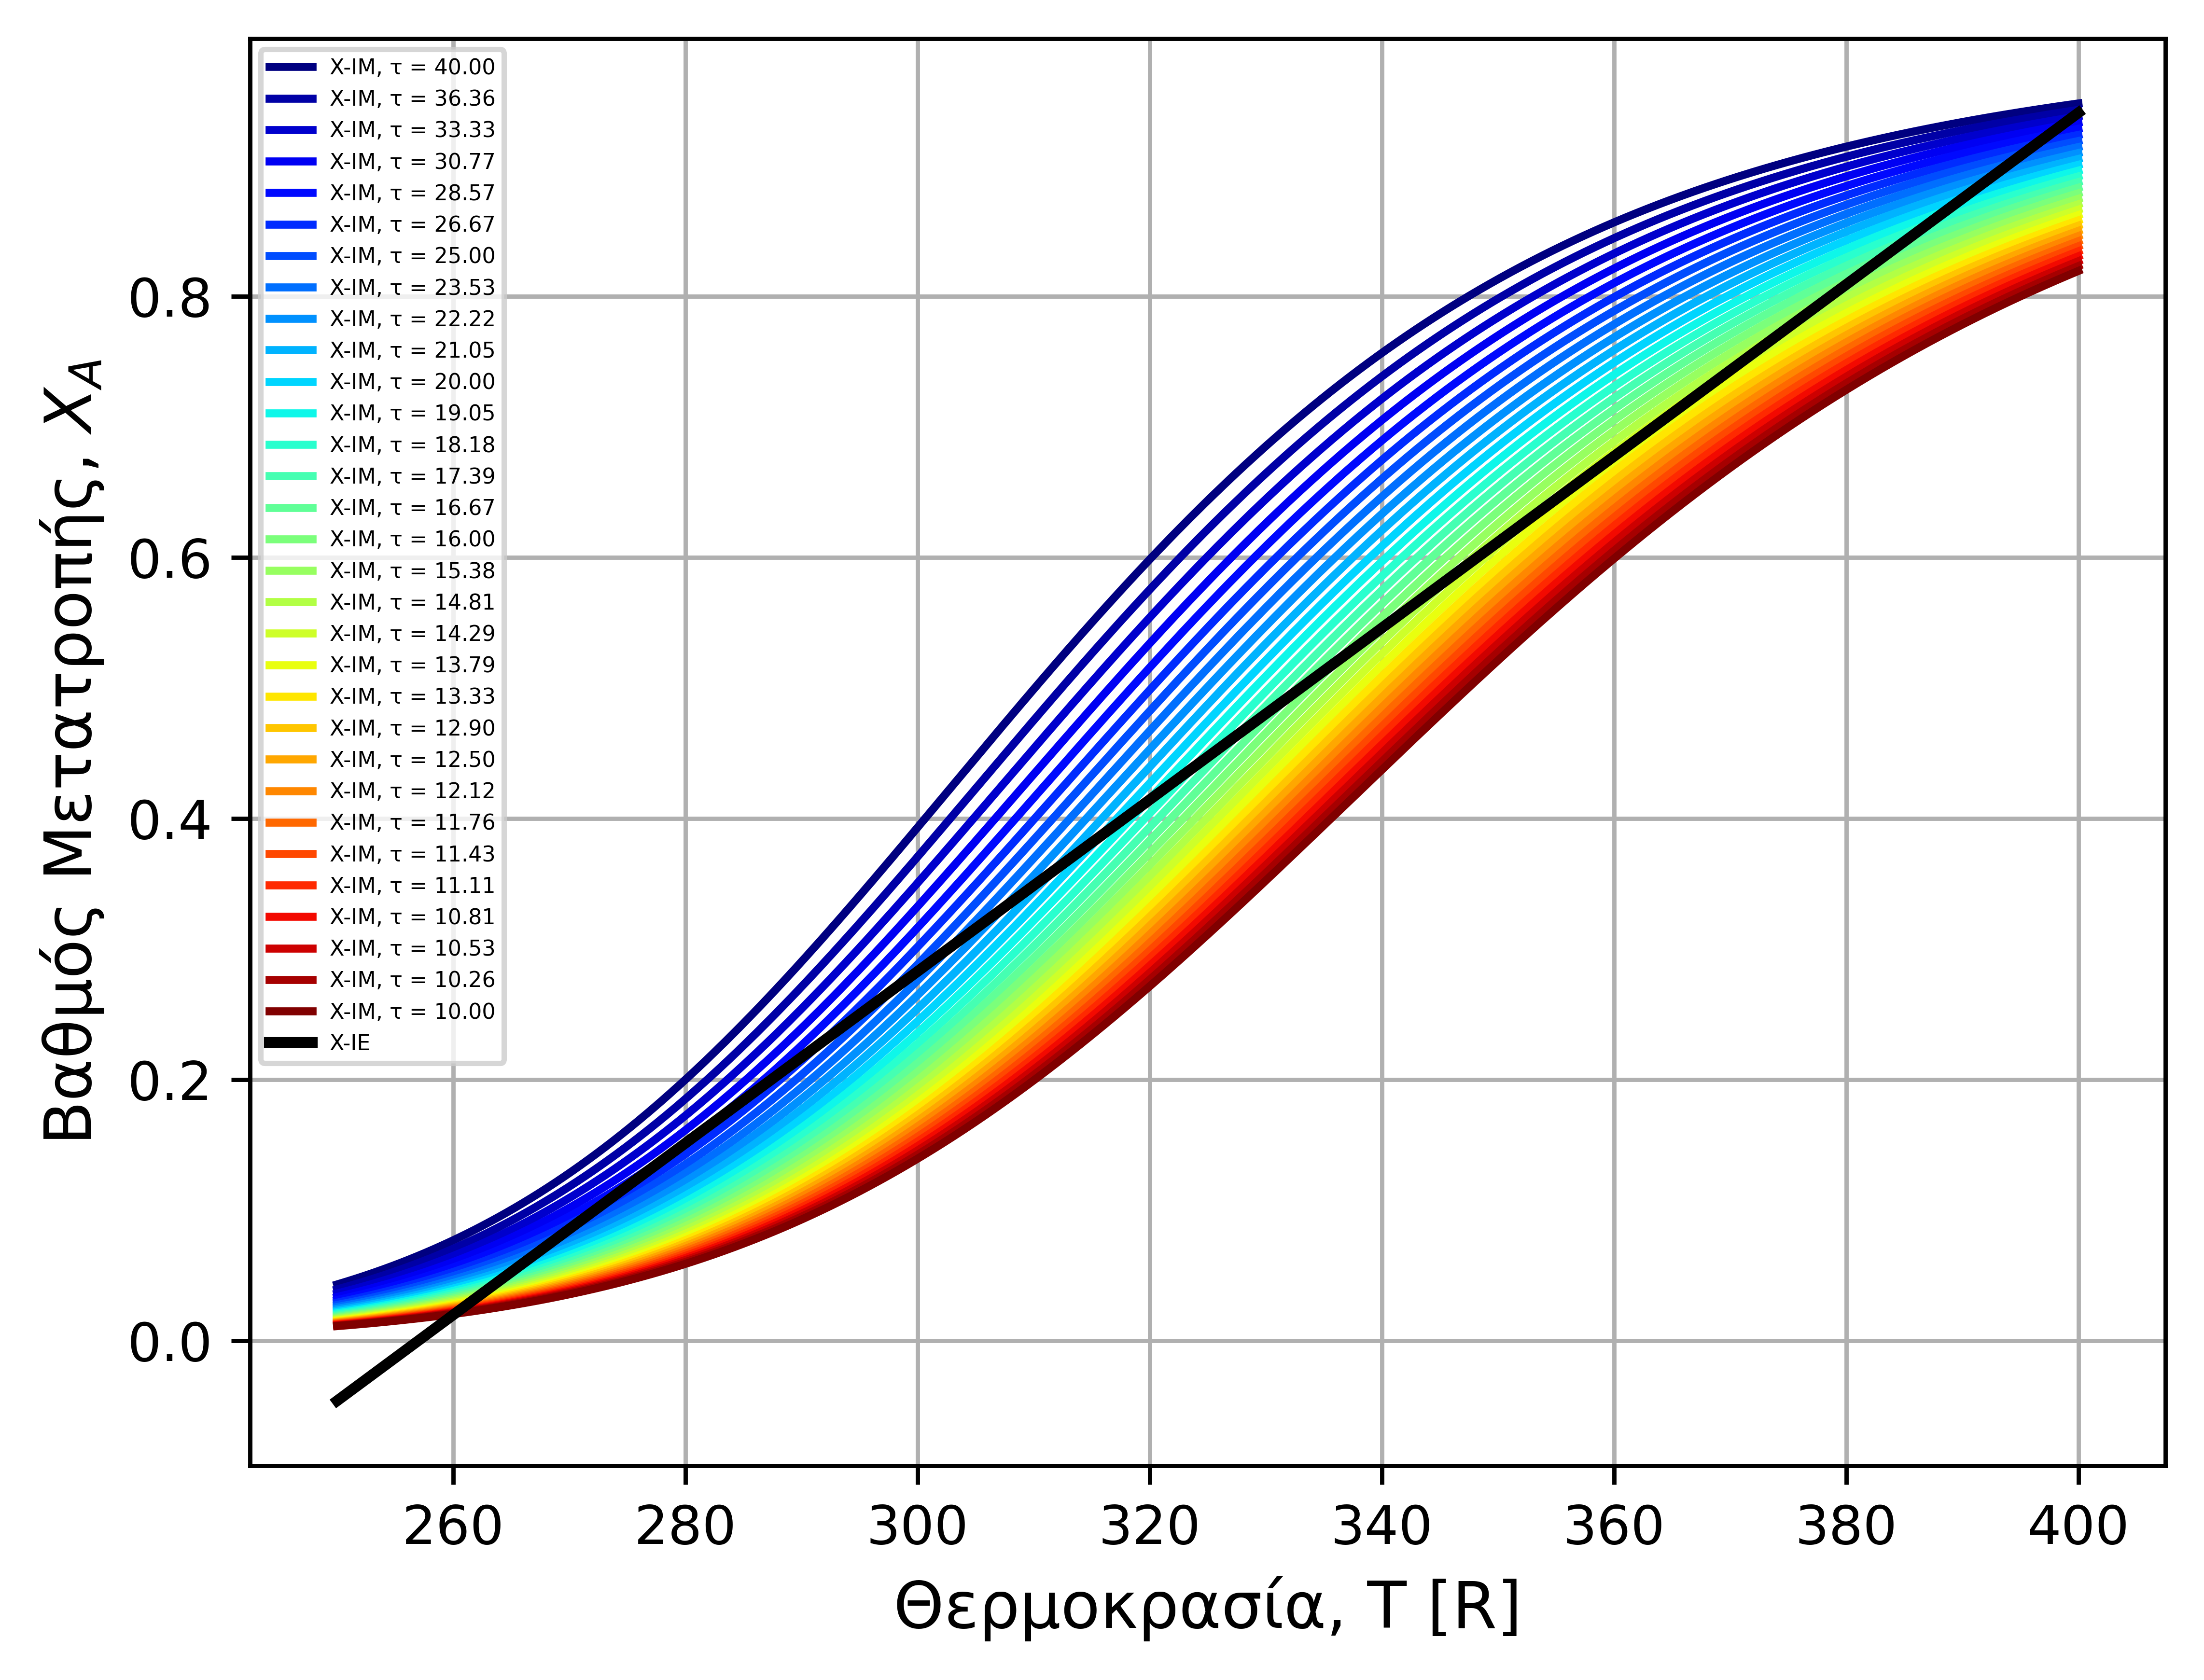

In [3]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
from scipy.optimize import fsolve

# Variable parameters
Qo = np.arange(1, 4.1, 0.1)     # Volumetric Flowrate (Inlet) (L/min)
T = np.linspace(250, 400, 1500) # Temperature range (Rankine)

# Fixed parameters
V = 40              # Reactor Volume (L)
rho = 1.1 * 1000    # Average Density (g/L)
CAo = 3.01          # Inlet Stream Concentration (mol/L)
CpA = 0.9           # Average Heat Capacity (cal/g/K)
k0 = 1e4            # Frequency coefficient (1/min)
E = 4000            # Activation Energy /R (cm^3/mol/min)
DHr = 50000         # Heat of Reaction (cal/mol)
To = 257            # Inlet Stream Temperature (K)

# Auxiliary equations
tau = V / Qo
k = k0 * np.exp(-E / T)

# Calculate Energy balance (X_eb) for Temperatures in range T
X_eb = rho * CpA * (T - To) / (CAo * DHr)

# Initialize variables that will store the mass balance equation results for different residence times and different temperatures
X_mb = np.zeros((len(tau), len(T)))
balance_diff = np.zeros((len(tau), len(T)))
legend_labels = []

# Calculate Mass balance (X_mb) for Volumetric flowrates in range Q and Temperatures in range T
for i in range(len(tau)):
    X_mb[i, :] = tau[i] * k / (1 + tau[i] * k)
    balance_diff[i, :] = np.abs(X_eb - X_mb[i, :])
    legend_labels.append(f'X-IM, τ = {tau[i]:.2f}')
    
# Plotting results
# Figure 1: Conversion vs Reactor Temperature for different tau
plt.figure(dpi=800)
cmap = plt.get_cmap('jet', len(tau))

for i in range(len(tau)):
    plt.plot(T, X_mb[i, :], color=cmap(i), linewidth=1.5, label=legend_labels[i])

plt.plot(T, X_eb, 'k-', linewidth=2, label='X-IE')
plt.grid(True)
plt.xlabel('Θερμοκρασία, Τ [R]', fontsize=12)
plt.ylabel('Βαθμός Μετατροπής, $X_A$', fontsize=12)
plt.legend(fontsize=4)
# plt.title('Βαθμός Μετατροπής vs θερμοκρασία για διαφορετικούς χρόνους χώρου')
plt.show()

In [ ]:
# Find and plot points where the mass balance and the energy balance intersect
# the implementation here is a bit lazy but it gets the job done
x_intersections = []

plt.figure(dpi=200)
for i in range(len(tau)):
    # instead of solving the two equations numerically, I find points where their difference
    # is very very small (lower than 0.001) and plot them on a scatter plot
    potential_intersections = np.where(balance_diff[i, :] < 0.001)[0]
    potential_intersections = np.unique(potential_intersections)
    if len(potential_intersections) > 0:
        
        for j in range(len(potential_intersections)):
            plt.scatter(tau[i], X_mb[i,potential_intersections[j]],color='blue',s=12)
            
    # You can use the lines below to store the values if you want    
    # x_int_tmp = np.column_stack((T[potential_intersections], balance_diff[i,potential_intersections], X_mb[i, potential_intersections], X_eb[potential_intersections]))
    # x_intersections.append(x_int_tmp)
    
# Add grid, legend, and labels
plt.grid(True)
plt.ylabel('Χρόνος Χώρου, τ [min]', fontsize=12)
plt.xlabel('Βαθμός Μετατροπής, $X_A$', fontsize=12)
plt.xlim(left=10, right=35)  # X-axis starts at 0
plt.ylim(bottom=0, top=1)  # Y-axis starts at 275
#plt.title("Χρόνος Χώρου vs Βαθμός Μετατροπής")
plt.show()

In [ ]:
# Find and plot points where the mass balance and the energy balance intersect
# the implementation here is a bit lazy but it gets the job done
T_intersections = []

plt.figure(dpi=200)
for i in range(len(tau)):
    # instead of solving the two equations numerically, I find points where their difference
    # is very very small (lower than 0.001) and plot them on a scatter plot
    potential_intersections = np.where(balance_diff[i, :] < 0.001)[0]
    potential_intersections = np.unique(potential_intersections)
    if len(potential_intersections) > 0:
        
        for j in range(len(potential_intersections)):
            plt.scatter(tau[i], T[potential_intersections[j]],color='red',s=12)
    
# Add grid, legend, and labels
plt.grid(True)
plt.ylabel('Χρόνος Χώρου, τ [min]', fontsize=12)
plt.xlabel('Θερμοκρασία, Τ [R]', fontsize=12)
plt.xlim(left=10, right=35)  # X-axis starts at 0
plt.ylim(bottom=250, top=410)  # Y-axis starts at 275
#plt.title("Χρόνος Χώρου vs Θερμοκρασία")
plt.show()

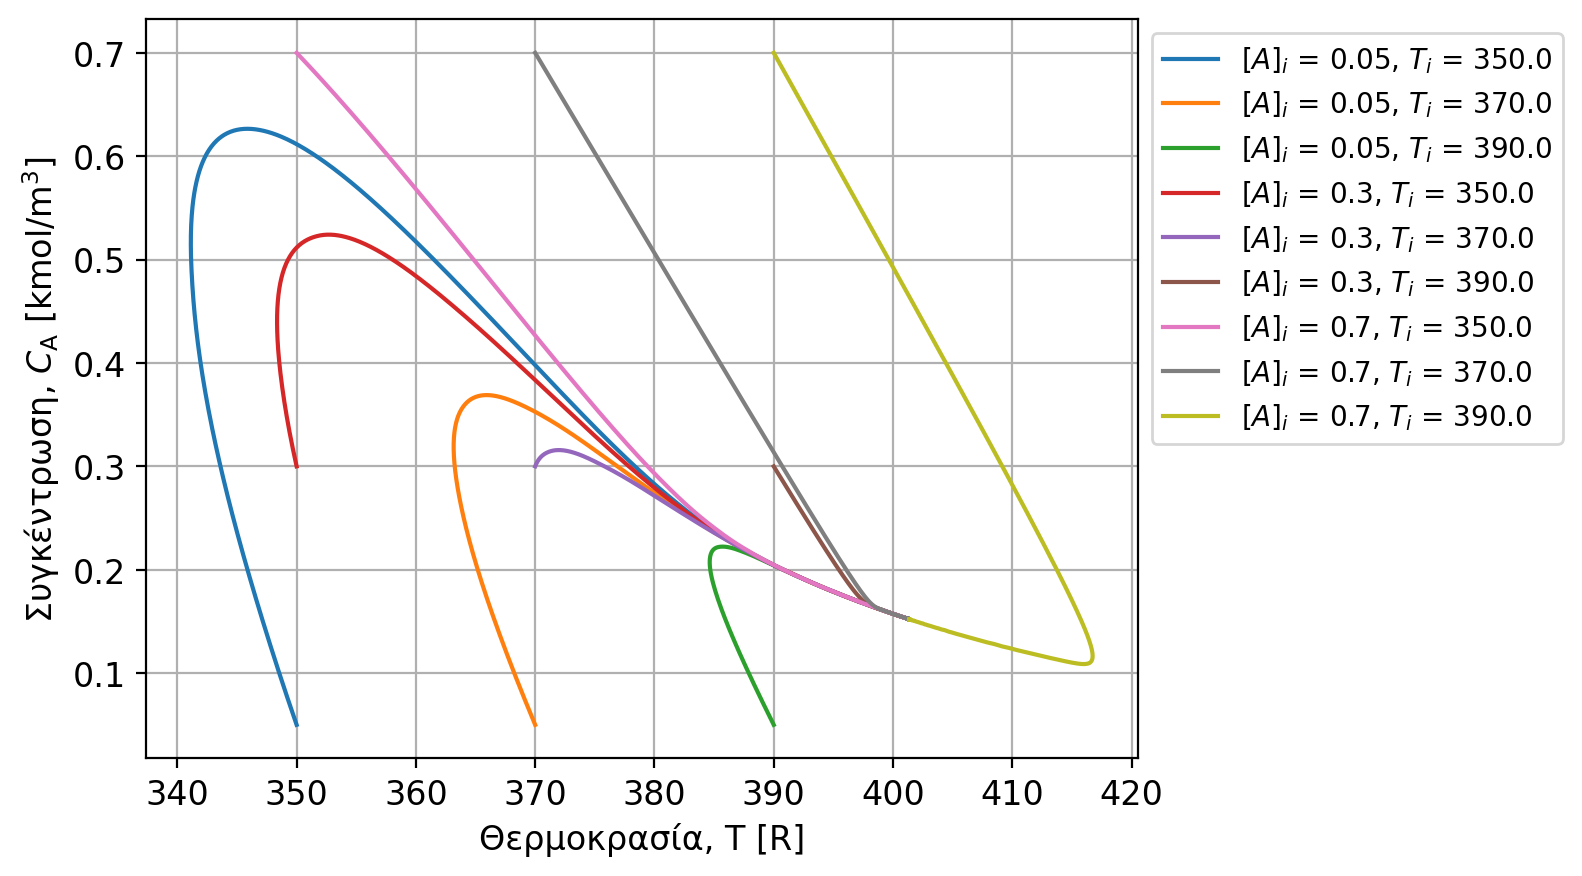

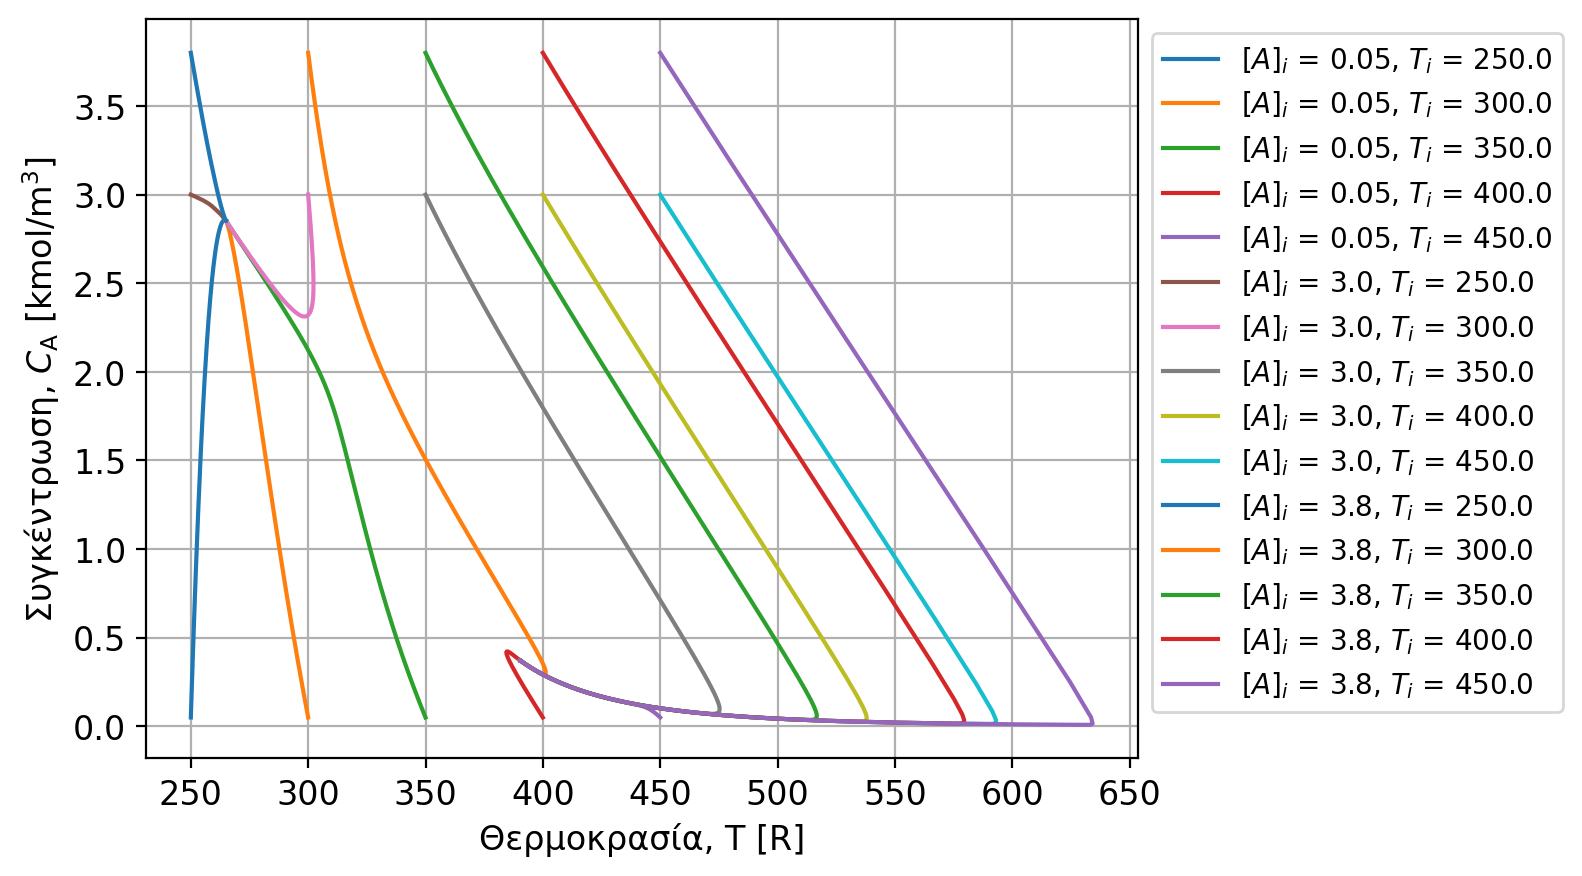

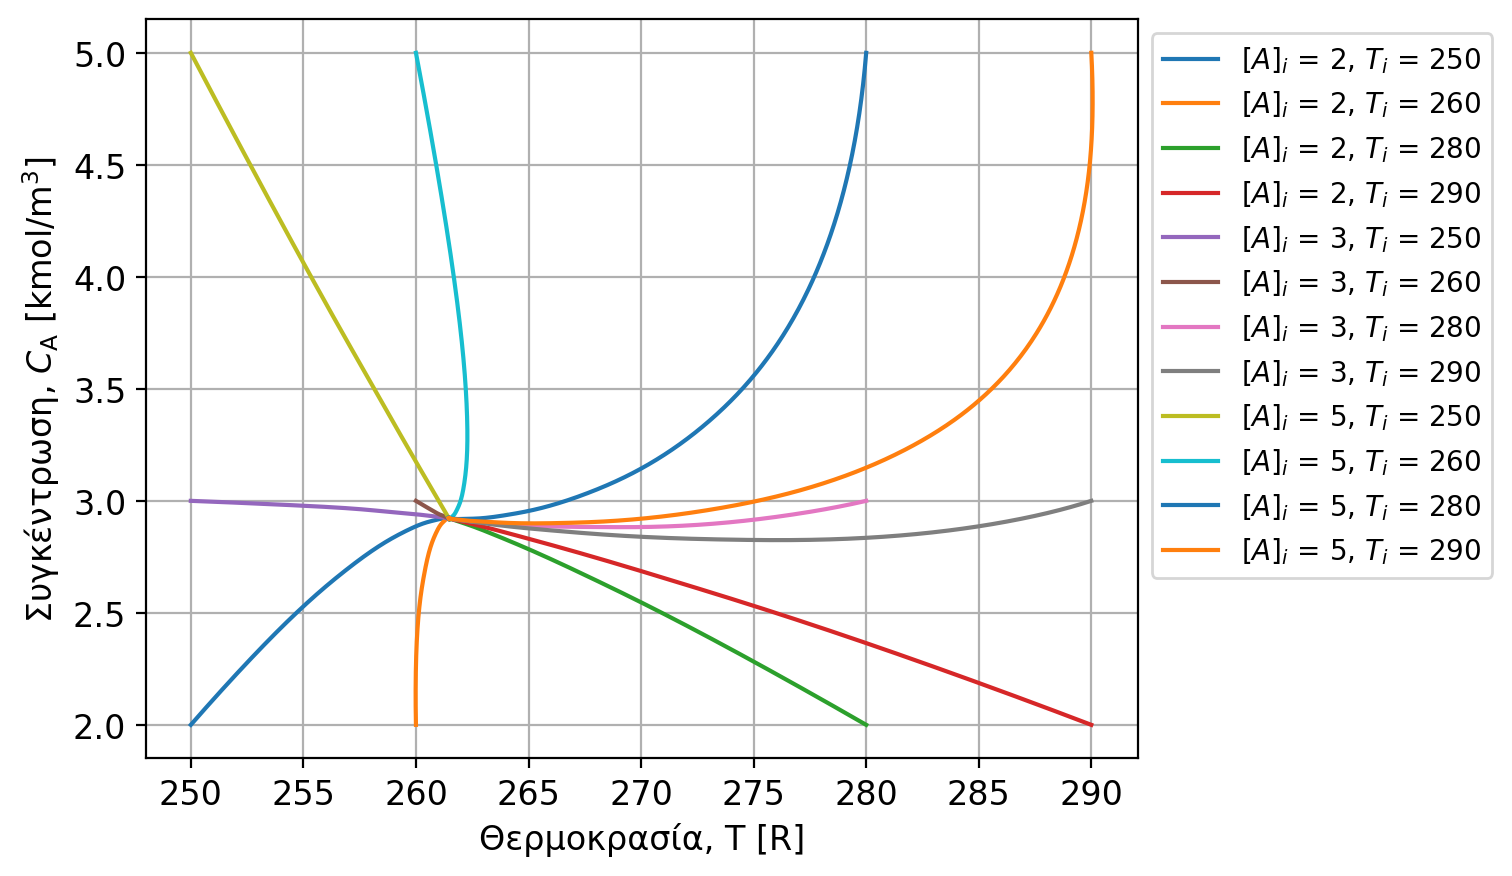

In [4]:
# Solve the system of ODEs for different combinations of initial conditions to generate the phase planes
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the ODE system as a Python function
def SXA_I_Example_7p10(t, x, Q):
    # Model Parameters
    V = 40              # Reactor Volume (L)
    rho = 1.1 * 1000    # Average Density (g/cm^3)
    CAo = 3.01          # Inlet Stream Concentration (mol/L)
    CpA = 0.9           # Average Heat Capacity (cal/g/K)
    k0 = 1e4            # Frequency coefficient (1/min)
    E = 4000            # Activation Energy /R (cm^3/mol/min)
    DHr = -50000        # Heat of Reaction (cal/kmol)
    To = 257            # Inlet Stream Temperature (K)
    
    # Auxiliary Equations
    tau = V / Q
    r = k0 * np.exp(-E / x[1]) * x[0]  # Reaction rate
    
    # Differential Equations
    dx = np.zeros(2)
    dx[0] = Q / V * (CAo - x[0]) - r  # Conversion rate of A
    dx[1] = (-(Q * rho * CpA) * (x[1] - To) - V * DHr * r) / (V * rho * CpA)  # Temperature change
    
    return dx

# Set Integration time scale
t_span = (0, 300)  # time span in hours
t_eval = np.linspace(0, 300, 3000)  # time points for evaluation

# First Plot for Q = 1 L/min
CAi = [0.05, 0.3, 0.7]
Ti = [350, 370, 390]
init_comb = np.array(np.meshgrid(CAi, Ti)).T.reshape(-1, 2)  # Create combinations of initial conditions

plt.figure(1,dpi=200)
for i in range(init_comb.shape[0]):
    Q = 1
    Init_Cond = init_comb[i, :]
    # Solve ODEs using solve_ivp
    sol = solve_ivp(SXA_I_Example_7p10, t_span, Init_Cond, args=(Q,), t_eval=t_eval)
    plt.plot(sol.y[1], sol.y[0],label=f'$[A]_i$ = {init_comb[i, 0]}, $T_i$ = {init_comb[i, 1]}')  # Plot temperature vs. conversion
plt.grid(True)
plt.ylabel('Συγκέντρωση, $C_Α$ [kmol/m$^3$]', fontsize=12)
plt.xlabel('Θερμοκρασία, Τ [R]', fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)  # Adjust legend position
# plt.xlim(left=250, right=650)
# plt.ylim(bottom=0, top=5)  
plt.gca().tick_params(axis='both', labelsize=12)

# Second Plot for Q = 2 L/min
CAi = [0.05, 3, 3.8]
Ti = [250, 300, 350, 400, 450]
init_comb = np.array(np.meshgrid(CAi, Ti)).T.reshape(-1, 2)

plt.figure(2,dpi=200)
for i in range(init_comb.shape[0]):
    Q = 2
    Init_Cond = init_comb[i, :]
    sol = solve_ivp(SXA_I_Example_7p10, t_span, Init_Cond, args=(Q,), t_eval=t_eval)
    plt.plot(sol.y[1], sol.y[0],label=f'$[A]_i$ = {init_comb[i, 0]}, $T_i$ = {init_comb[i, 1]}')  # Plot temperature vs. conversion
plt.grid(True)
plt.ylabel('Συγκέντρωση, $C_Α$ [kmol/m$^3$]', fontsize=12)
plt.xlabel('Θερμοκρασία, Τ [R]', fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)  # Adjust legend position
# plt.xlim(left=250, right=650)
# plt.ylim(bottom=0, top=5)  
plt.gca().tick_params(axis='both', labelsize=12)

# Third Plot for Q = 3 L/min
CAi = [2, 3, 5]
Ti = [250, 260, 280, 290]
init_comb = np.array(np.meshgrid(CAi, Ti)).T.reshape(-1, 2)

plt.figure(3,dpi=200)
for i in range(init_comb.shape[0]):
    Q = 3
    Init_Cond = init_comb[i, :]
    sol = solve_ivp(SXA_I_Example_7p10, t_span, Init_Cond, args=(Q,), t_eval=t_eval)
    plt.plot(sol.y[1], sol.y[0],label=f'$[A]_i$ = {init_comb[i, 0]}, $T_i$ = {init_comb[i, 1]}')  # Plot temperature vs. conversion
plt.grid(True)
plt.ylabel('Συγκέντρωση, $C_Α$ [kmol/m$^3$]', fontsize=12)
plt.xlabel('Θερμοκρασία, Τ [R]', fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)  # Adjust legend position
# plt.xlim(left=250, right=650)
# plt.ylim(bottom=0, top=5)  
plt.gca().tick_params(axis='both', labelsize=12)

plt.show()
